# Descripción del DATASET

El Dataset de customer_purchases contiene información sobre compras hechas por clientes, con atributos que proporcionan:
- Datos del cliente: edad, antiguedad, género.
- Datos del producto: categoría, color, rating promedio, precio, num rating, años desde su lanzamiento.
- Detalles de compra: que dispositivo se uso, fecha, rating del cliente, label.




# Resumen estadístico 
Analizar variables y ver que tipo son.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("../datasets/customer_purchases/customer_purchases_train_preprocessed.csv")



print("=== INFORMACIÓN GENERAL ===")
print(df.info())
print("\n")


print("=== PRIMERAS FILAS ===")
print(df.head(), "\n")


print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe().T)  
print("\n")


print("=== DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS ===")

categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
if len(categoricas) > 0:
    for col in categoricas:
        print(f"\n{col}:")
        print(df[col].value_counts())
else:
    print("No se encontraron columnas categóricas en el dataset.\n")


print("=== VALORES FALTANTES ===")
print(df.isnull().sum())
print("\n")

print("=== RANGO Y VARIABILIDAD ===")
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, rango={df[col].max()-df[col].min()}")


=== INFORMACIÓN GENERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   purchase_id               7289 non-null   int64  
 1   customer_id_num           7289 non-null   int64  
 2   customer_age              7289 non-null   int64  
 3   customer_gender           7289 non-null   int64  
 4   item_id_num               7289 non-null   int64  
 5   item_title_num            7289 non-null   int64  
 6   item_category_num         6613 non-null   float64
 7   item_price                7289 non-null   float64
 8   item_color                7289 non-null   int64  
 9   item_avg_rating           7244 non-null   float64
 10  item_num_ratings          7289 non-null   int64  
 11  item_years_since_release  7289 non-null   float64
 12  purchase_timestamp        7289 non-null   object 
 13  customer_item_views       7289 non-

# Distribución de Datos
Relaciones entre datos para ver coincidencias de compra.

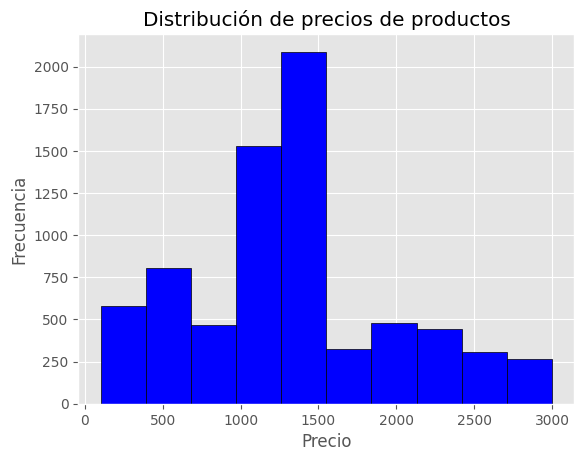

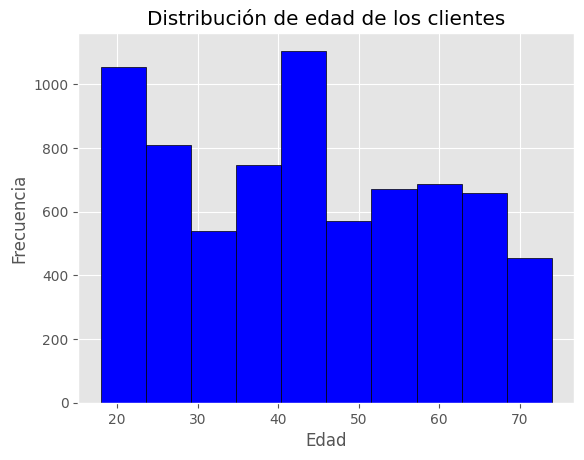

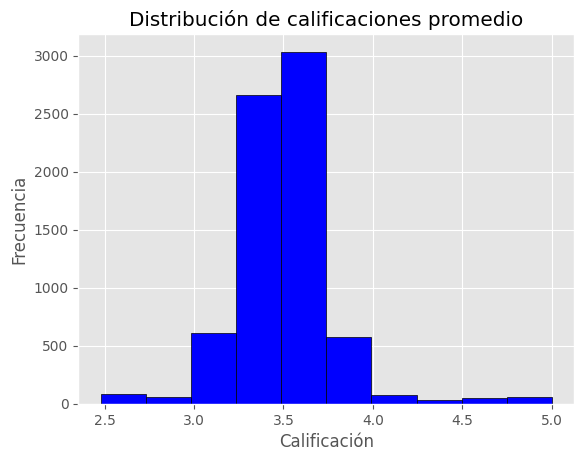

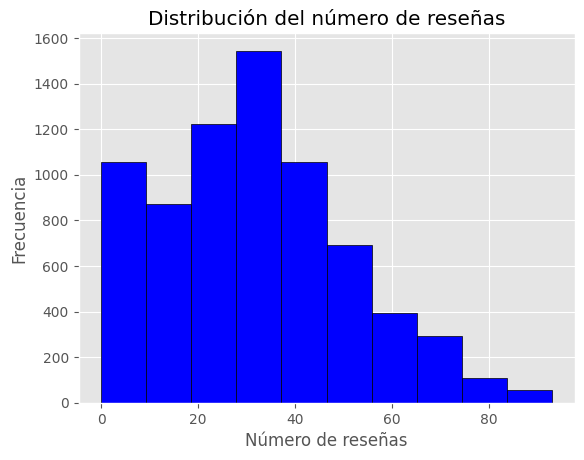

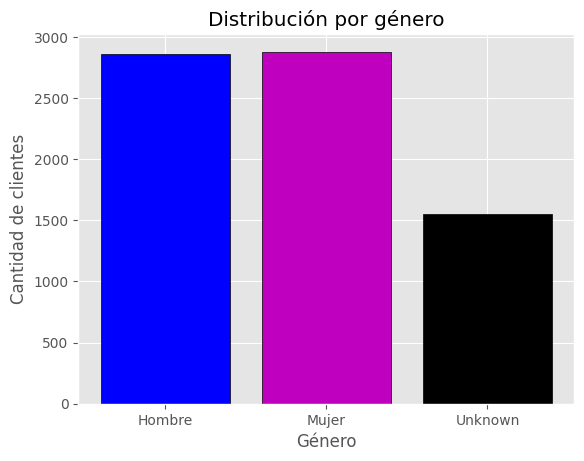

In [ ]:
import matplotlib.pyplot as plt


plt.hist(df['item_price'], edgecolor='k', color='b')
plt.title('Distribución de precios de productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

if 'customer_age' in df.columns:
    
    plt.hist(df['customer_age'], edgecolor='k', color='b')
    plt.title('Distribución de edad de los clientes')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.show()

if 'item_avg_rating' in df.columns:
    
    plt.hist(df['item_avg_rating'], edgecolor='k', color='b')
    plt.title('Distribución de calificaciones promedio')
    plt.xlabel('Calificación')
    plt.ylabel('Frecuencia')
    plt.show()

if 'item_num_ratings' in df.columns:
    
    plt.hist(df['item_num_ratings'], edgecolor='k', color='b')
    plt.title('Distribución del número de reseñas')
    plt.xlabel('Número de reseñas')
    plt.ylabel('Frecuencia')
    plt.show()


if 'customer_gender' in df.columns:
    
    conteo = df['customer_gender'].value_counts().sort_index()
    etiquetas = ['Hombre', 'Mujer', 'Unknown']
    plt.bar(etiquetas[:len(conteo)], conteo, color=['b','m','k'], edgecolor='k')
    plt.title('Distribución por género')
    plt.xlabel('Género')
    plt.ylabel('Cantidad de clientes')
    plt.show()


Con estas gráficas nos dimos cuenta que el consumo de productos recae en los precios de $1000 a $1500, lo que significa que si se compran productos un poco elevados.
Los clientes con más frecuencia son los de 20 y 45 años aprox. Lo que refleja que no es un público tan grande.
Son casi la misma cantidad de hombres que de mujeres.
El rating promedio es mayor a la mitad por lo que existe satisfacción por parte de los clientes.

In [20]:

if 'customer_gender' in df.columns and 'item_title' in df.columns:

    compras_por_genero = df.groupby(['customer_gender', 'item_title']).size().unstack(fill_value=0)

    total_por_genero = compras_por_genero.sum(axis=1)

    print("=== TOTAL DE COMPRAS POR GÉNERO ===")
    print(total_por_genero, "\n")

    top_mujeres = compras_por_genero.loc[1].sort_values(ascending=False).head(5)
    top_hombres = compras_por_genero.loc[0].sort_values(ascending=False).head(5)
    top_unknown = compras_por_genero.loc[2].sort_values(ascending=False).head(5)

    print("Top 5 productos más comprados por mujeres:\n", top_mujeres)
    print("\nTop 5 productos más comprados por hombres:\n", top_hombres)
    print("\nTop 5 productos más comprados por género desconocido:\n", top_unknown)

    plt.figure(figsize=(8,4))
    plt.bar(top_mujeres.index, top_mujeres.values, color='m', edgecolor='k')
    plt.title('Top 5 productos más comprados por mujeres')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad de compras')
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,4))
    plt.bar(top_hombres.index, top_hombres.values, color='b', edgecolor='k')
    plt.title('Top 5 productos más comprados por hombres')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad de compras')
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,4))
    plt.bar(top_unknown.index, top_unknown.values, color='k', edgecolor='kk')
    plt.title('Top 5 productos más comprados (Unknown)')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad de compras')
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    plt.tight_layout()
    plt.show()
